###Importing the Data
The dataset can be found [here](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression)<br/>
You can either directly upload to the notebook, or if you are using Google Colab you can upload the dataset to drive and copy it using the codeblock below.
If running on your local notebook, you dont need to run the codeblock below.

In [1]:
!cp drive/My\ Drive/Salary_Data.csv .

In [ ]:
!pip install celluloid

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

df = pd.read_csv("Salary_Data.csv")
dataset = np.array(df)
X = dataset[:, 0]
Y = dataset[:, 1]
Y=Y/1e3

In [31]:
X_train = X[:25]
Y_train = Y[:25]
X_test = X[25:]
Y_test = Y[25:]

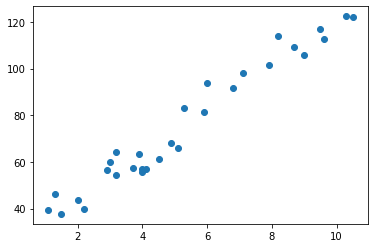

In [4]:
plt.scatter(X, Y)

In [71]:
class LinearRegression:
  def __init__(self, dim, lr, max_it, tol):
    self.W = -10.22739516
    self.b = 100
    self.learning_rate = lr
    self.max_it = max_it
    self.tolerance = tol
    self.weight_history = []
    self.loss_history = []

  def train(self, X_train, Y_train, toPrint = False):
    for it in range(self.max_it):
      if it != 0 and np.linalg.norm(np.array(self.weight_history[-1]) - np.array([self.W, self.b])) < self.tolerance:
        break
      self.weight_history.append([self.W, self.b])
      y_hat = self.W*X_train + self.b
      loss = self.loss_function(y_hat, Y_train)
      if toPrint:
        print("Iteration: ", it, " Loss: ", loss)
      self.loss_history.append(loss)
      #Gradients
      grad_w = 2*np.mean((y_hat - Y_train) * X_train)
      grad_b = 2*np.mean((y_hat - Y_train))

      #Updates
      self.W -= self.learning_rate * grad_w
      self.b -= self.learning_rate * grad_b
    print("Training Complete")
  
  def loss_function(self, y_hat, Y):
    return np.mean((y_hat - Y)**2)

  def test(self, X_test, Y_test):
    y_test_hat = self.W * X_test + self.b
    return self.loss_function(y_test_hat, Y_test)

  def predict(self, x_to_predict):
    if x_to_predict < 0:
      raise Exception("Experience cannot be below 0!")
    return self.W * x_to_predict + self.b

  def plotTheLine(self):
    plot_x = np.arange(0, 11, 0.1)
    plot_y = (model.W*plot_x + model.b).reshape(-1,)

    plt.figure(figsize=(8,6))
    plt.plot(plot_x, plot_y, c='r')
    plt.scatter(X, Y, s=10)
    plt.xlabel("Experience (years)")
    plt.ylabel("Annual Salary (in $)")
    plt.show()

  def animateChange(self, changeSpeed = 10):
    fig = plt.figure()
    camera = Camera(fig)
    for i in range(0, len(model.weight_history), 10):
      x = np.arange(0, 11, 0.1)
      y = model.weight_history[i][0] * x + model.weight_history[i][1]
      y = y.reshape(-1)
      plt.plot(x, y, c='r')
      plt.scatter(X, Y, s=10, c='b')
      plt.xlabel("Experience (years)")
      plt.ylabel("Annual Salary (in $)")
      camera.snap()

    animation = camera.animate()
    return animation
  def animateLoss(self, changeSpeed = 10):
    fig = plt.figure()
    camera = Camera(fig)
    for i in range(0, 100):
      plt.plot(model.loss_history[:i], c='b')
      plt.xlabel("Iteration")
      plt.ylabel("Loss Value")
      camera.snap()

    animation = camera.animate()
    return animation

###Initialize the model

In [72]:
### HyperParameters ###

dimension = 1
learning_rate = 0.0385
max_iteration = 200
tolerance = 1e-5

#######################

model = LinearRegression(1, 0.0385, 200, 1e-5)

###Plot the initial untrained line

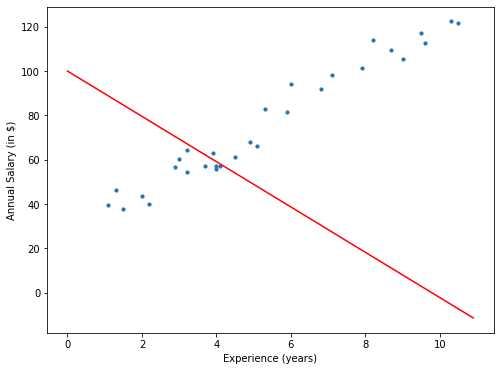

In [73]:
model.plotTheLine()

###Train the model

In [74]:
model.train(X_train, Y_train, False)

Training Complete


###Final trained model

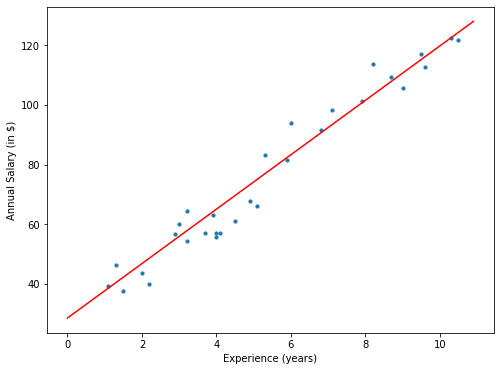

In [75]:
model.plotTheLine()

###Animations of change of the model and loss

In [ ]:
animation = model.animateChange()
HTML(animation.to_html5_video())

In [ ]:
animation = model.animateLoss()
HTML(animation.to_html5_video())

###Testing the model

In [76]:
test_loss = model.test(X_test, Y_test)
print("The model predicted unseen data with ", test_loss, "k$ difference")

The model predicted unseen data with  9.403194504840554 k$ difference


###Predictions
Try different values of experience years, and get the approximate salary

In [77]:
ExperienceYears = 2
salary = model.predict(ExperienceYears)
print("With ", ExperienceYears, " years of experience, the annual salary should be ", salary*1e3, "$")

With  2  years of experience, the annual salary should be  46795.600790280856 $
